In [61]:
import numpy as np
import pandas as pd
import sktime
from sktime.datasets import load_from_tsfile
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score, confusion_matrix,
                             ConfusionMatrixDisplay, precision_score, recall_score)
import xgboost as xgb

### Replicating results from [paper](https://link.springer.com/article/10.1007/s10618-020-00727-3)

In [1]:
!ls data

AtrialFibrillation
Epilepsy
FaceDetection
Heartbeat


In [2]:
!ls data/Epilepsy

Epilepsy.jpg
Epilepsy.txt
Epilepsy_TEST.arff
Epilepsy_TEST.ts
Epilepsy_TRAIN.arff
Epilepsy_TRAIN.ts
EpilepsyDimension1_TEST.arff
EpilepsyDimension1_TRAIN.arff
EpilepsyDimension2_TEST.arff
EpilepsyDimension2_TRAIN.arff
EpilepsyDimension3_TEST.arff
EpilepsyDimension3_TRAIN.arff


In [81]:
X_train, y_train = load_from_tsfile('data/Epilepsy/Epilepsy_TRAIN.ts')

In [82]:
X_train.iloc[0, 0]

0      0.35
1      0.40
2      0.44
3      0.47
4      0.48
       ... 
201    0.58
202    0.61
203    0.62
204    0.65
205    0.69
Length: 206, dtype: float64

In [83]:
X_train

,dim_0,dim_1,dim_2
0,0 0.35 1 0.40 2 0.44 3 0.4...,0 0.22 1 0.01 2 -0.71 3 -0.3...,0 0.55 1 0.51 2 0.52 3 0.4...
1,0 -0.91 1 -0.92 2 -0.95 3 -0.9...,0 -0.05 1 -0.02 2 0.01 3 0.0...,0 0.06 1 -1.57 2 -0.99 3 0.2...
2,0 0.32 1 0.71 2 0.70 3 0.7...,0 1.00 1 -1.33 2 -1.44 3 -0.1...,0 0.37 1 0.37 2 0.37 3 0.3...
3,0 -0.68 1 -0.36 2 -0.13 3 -0.3...,0 -1.69 1 -0.58 2 1.05 3 -0.1...,0 0.31 1 0.31 2 0.32 3 0.0...
4,0 0.34 1 0.53 2 0.58 3 0.6...,0 -0.89 1 1.17 2 1.00 3 -1.8...,0 0.45 1 -0.05 2 -0.17 3 -0.4...
...,...,...,...
132,0 0.45 1 -0.28 2 0.28 3 1.3...,0 -0.21 1 -1.20 2 -1.26 3 -0.4...,0 -0.58 1 -0.87 2 -0.38 3 -0.0...
133,0 0.24 1 -0.79 2 -0.65 3 0.0...,0 0.50 1 0.69 2 0.86 3 0.6...,0 -0.99 1 -0.99 2 -0.65 3 -0.4...
134,0 1.16 1 -0.02 2 -1.04 3 -0.8...,0 0.90 1 0.59 2 0.52 3 0.2...,0 -1.03 1 -1.11 2 -0.88 3 -0.9...
135,0 -0.74 1 -0.14 2 0.12 3 -0.0...,0 -0.19 1 -0.24 2 -0.34 3 -0.6...,0 -0.14 1 -0.26 2 -0.27 3 -0.3...


In [13]:
X_test, y_test = load_from_tsfile('data/Epilepsy/Epilepsy_TEST.ts')

In [27]:
rocket = Rocket()

In [28]:
%%time
rocket.fit(X_train)

CPU times: total: 1.25 s
Wall time: 1.21 s


Rocket()

In [31]:
%%time
X_train_transform = rocket.transform(X_train)

CPU times: total: 7.47 s
Wall time: 7.46 s


In [32]:
X_train_transform

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.268421,2.921161,0.563107,8.241893,0.228155,2.271796,0.490291,11.229739,0.506849,5.163233,...,0.432039,5.640037,0.488506,7.777313,0.451219,10.333654,0.493671,7.804301,0.954545,17.563549
1,0.163158,1.113941,0.640777,7.252319,0.218447,1.105968,0.509709,5.160439,0.356164,3.348906,...,0.305825,7.296195,0.344828,5.567925,0.500000,7.544441,0.474684,6.509088,0.454545,3.834162
2,0.326316,4.566130,0.592233,9.801344,0.223301,1.534522,0.485437,10.076080,0.541096,7.305917,...,0.495146,3.547104,0.436782,5.023430,0.371951,8.982121,0.506329,6.952520,0.590909,7.598972
3,0.363158,5.269920,0.558252,11.637791,0.092233,3.691025,0.563107,8.940980,0.500000,6.710880,...,0.606796,4.041457,0.304598,13.743900,0.402439,5.357757,0.531646,11.550533,0.500000,4.829031
4,0.178947,2.510476,0.563107,7.427470,0.194175,1.375498,0.461165,9.103161,0.465753,7.027081,...,0.456311,5.196375,0.459770,4.680574,0.439024,11.907518,0.512658,6.476917,0.545455,6.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.415789,3.291727,0.533981,7.791546,0.237864,1.423134,0.601942,3.604524,0.520548,4.188052,...,0.446602,4.312071,0.436782,4.076413,0.481707,9.161545,0.487342,9.861870,0.500000,5.215230
133,0.189474,0.674430,0.533981,8.095456,0.194175,1.805469,0.495146,8.119704,0.472603,4.945912,...,0.417476,5.093260,0.419540,8.001760,0.359756,4.473879,0.462025,5.986087,0.181818,1.375361
134,0.357895,2.285860,0.597087,7.769724,0.291262,2.444241,0.572816,10.187362,0.506849,3.061164,...,0.359223,5.472654,0.580460,12.764709,0.414634,8.612001,0.468354,7.330034,0.500000,7.295849
135,0.142105,0.774721,0.529126,8.635578,0.339806,2.448869,0.553398,8.940462,0.493151,5.773390,...,0.422330,3.582950,0.471264,7.323222,0.439024,4.532538,0.474684,6.705611,0.545455,5.947022


In [33]:
classifier = RidgeClassifier()

In [34]:
classifier.fit(X_train_transform, y_train)

RidgeClassifier()

In [35]:
classifier.score(X_train_transform, y_train)

1.0

In [39]:
X_test_transform = rocket.transform(X_test)

In [102]:
def print_cv_metrics(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test).round()
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{classifier} ->')
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'recall: {rec:.4f}')
    print(f'F1: {f1:.4f}\n')
    display(ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot())
    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }

In [58]:
res_df = pd.DataFrame()

RidgeClassifier() ->
Accuracy: 0.9783
Precision: 0.9789
recall: 0.9783
F1: 0.9783



C:\Users\Lucas\AppData\Local\Temp\ipykernel_10028\3712165910.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append(pd.DataFrame(data=print_cv_metrics(classifier), index=['ridge on rocket']))


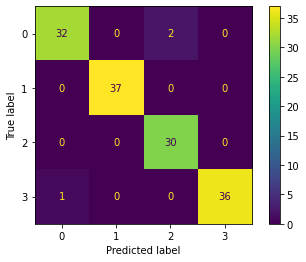

In [59]:
res_df = res_df.append(pd.DataFrame(data=print_cv_metrics(classifier, X_test_transform, y_test), index=['ridge on rocket']))

In [78]:
label_encoder = {label: i for i, label in enumerate(set(y_train))}
label_decoder = {i: label for label, i in label_encoder.items()}
label_encoder, label_decoder

({'walking': 0, 'epilepsy': 1, 'running': 2, 'sawing': 3},
 {0: 'walking', 1: 'epilepsy', 2: 'running', 3: 'sawing'})

In [84]:
encoded_y_train = [label_encoder[label] for label in y_train]

In [86]:
dtrain = xgb.DMatrix(X_train_transform, encoded_y_train)

In [87]:
booster = xgb.train({}, dtrain)

In [88]:
booster

In [91]:
encoded_y_test = [label_encoder[label] for label in y_test]

In [96]:
dxtest = xgb.DMatrix(X_test_transform)

<xgboost.core.Booster object at 0x0000019A43C79A60> ->
Accuracy: 0.8188
Precision: 0.8288
recall: 0.8188
F1: 0.8186



C:\Users\Lucas\AppData\Local\Temp\ipykernel_10028\4045474285.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_df = res_df.append(pd.DataFrame(data=print_cv_metrics(booster, dxtest, encoded_y_test), index=['xgb on rocket']))


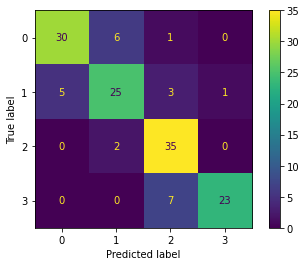

In [103]:
res_df = res_df.append(pd.DataFrame(data=print_cv_metrics(booster, dxtest, encoded_y_test), index=['xgb on rocket']))

In [111]:
res_df.sort_values('f1', ascending=False)

,accuracy,precision,recall,f1
ridge on rocket,0.978261,0.978947,0.978261,0.978283
xgb on rocket,0.818841,0.828797,0.818841,0.818600
